# Pari Pandey
# ITP 259 Fall 2023
# Final Project  
# Problem 1

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib.font_manager import FontProperties
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [3]:
font_path = "/content/drive/MyDrive/ITP259/SimHei.ttf"
sim_hei = matplotlib.font_manager.FontProperties(fname=font_path)
matplotlib.font_manager.fontManager.addfont(font_path)

1. Read in the data. (1)

In [4]:
chinese = pd.read_csv("/content/drive/MyDrive/ITP259/chineseMNIST.csv")


chinese_pixels = chinese.iloc[:, :4096]
chinese_info = chinese.iloc[:,4096:]

2. Plot the count (histogram) of each Chinese number. (1)

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '100'),
 Text(12, 0, '1000'),
 Text(13, 0, '10000'),
 Text(14, 0, '100000000')]

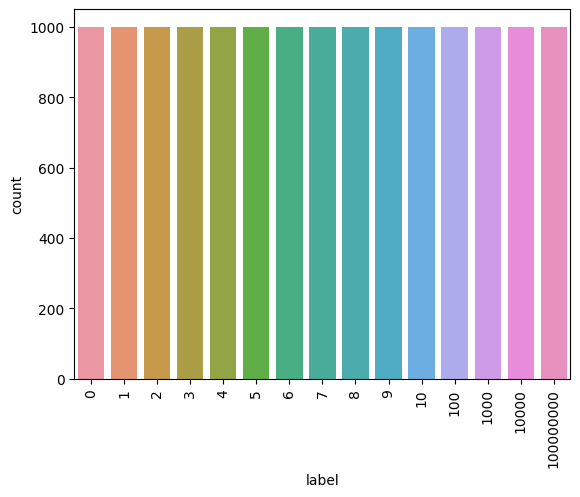

In [5]:
hist = sb.countplot(x = 'label', data = chinese)
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)

3.	Visualize 25 random characters from the full dataset. Be sure that the plot shows both the English number and the Chinese number as shown below. (4)

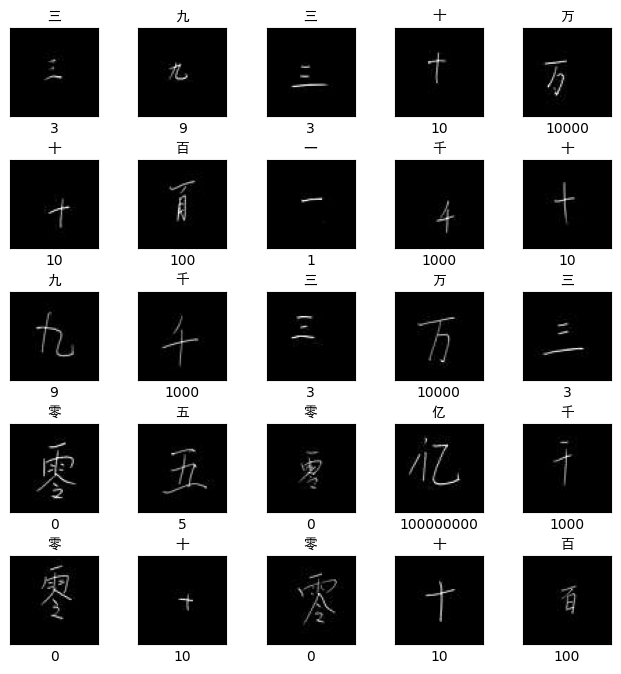

In [6]:
plt.figure(figsize = (8,8))

for i in range(25):
  plt.subplot(5, 5, i+1);
  index = chinese_pixels.sample().index
  image = np.array([chinese_pixels.iloc[index]]).reshape(64,64)
  plt.imshow(image, cmap = 'gray')
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(chinese_info.iloc[index[0],0], fontfamily = 'sans-serif', fontsize = 10)
  plt.title(chinese_info.iloc[index[0],1], fontfamily='SimHei', fontsize = 10)
  plt.subplots_adjust(hspace = 0.5)

4.	Scale the pixel values (1)

In [7]:
chinese_pixels = chinese_pixels / 255
to_14 = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 10:10, 100:11, 1000:12, 10000:13, 100000000:14}
to_orig = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 10:10, 11:100, 12:1000, 13:10000, 14:100000000}

scaled_labels = []

for number in chinese_info.iloc[:, 0]:
  scaled_labels.append(to_14[number])

scaled_labels = pd.Series(scaled_labels)

5.	Partition the dataset into train and test sets. Print the shapes of the train and test data sets. (1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(chinese_pixels, scaled_labels, test_size = 0.3, random_state = 2023, stratify = scaled_labels)

In [9]:
print("X_train.shape:", X_train.shape)
print("y_train.shape:",y_train.shape)
print("X_test.shape:",X_test.shape)
print("y_test.shape:",y_test.shape)

X_train.shape: (10500, 4096)
y_train.shape: (10500,)
X_test.shape: (4500, 4096)
y_test.shape: (4500,)


6.	Build a model of the NN using keras layers. The type, number and hyperparameters of layers is up to you. (3)

In [10]:
model = Sequential()

model.add(Conv2D(100, kernel_size = (3, 3), strides = (1,1), padding = 'same',
                 activation = 'relu', input_shape = (64, 64, 1)))

model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model.add(Dropout(0.25))

model.add(Conv2D(75, kernel_size = (3, 3), strides = (1,1), padding = 'same',
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(15, activation = 'softmax'))

7.	Display the model summary. (1)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 100)       1000      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 100)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 100)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 75)        67575     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 75)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 75)        0

8.	Use the loss function sparse_categorical_crossentropy when compiling the model. (1)

In [12]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

9.	Train the model with at least 50 epochs. (1)

In [13]:
X_train = np.array(X_train).reshape(-1,64,64)
X_test = np.array(X_test).reshape(-1,64,64)

chinese_data = model.fit(X_train, y_train, batch_size = 64, epochs = 50, verbose = True, validation_data = (X_test, y_test))

Epoch 1/50
165/165 [==============================] - 16s 29ms/step - loss: 1.0539 - accuracy: 0.6739 - val_loss: 0.3734 - val_accuracy: 0.8742
Epoch 2/50
165/165 [==============================] - 5s 28ms/step - loss: 0.2810 - accuracy: 0.9035 - val_loss: 0.2468 - val_accuracy: 0.9162
Epoch 3/50
165/165 [==============================] - 4s 27ms/step - loss: 0.1534 - accuracy: 0.9504 - val_loss: 0.1712 - val_accuracy: 0.9424
Epoch 4/50
165/165 [==============================] - 4s 25ms/step - loss: 0.0853 - accuracy: 0.9730 - val_loss: 0.1352 - val_accuracy: 0.9549
Epoch 5/50
165/165 [==============================] - 4s 25ms/step - loss: 0.0643 - accuracy: 0.9800 - val_loss: 0.1322 - val_accuracy: 0.9598
Epoch 6/50
165/165 [==============================] - 5s 28ms/step - loss: 0.0415 - accuracy: 0.9851 - val_loss: 0.1323 - val_accuracy: 0.9564
Epoch 7/50
165/165 [==============================] - 4s 25ms/step - loss: 0.0382 - accuracy: 0.9873 - val_loss: 0.1024 - val_accuracy: 0.967

10.	Plot the loss and accuracy curves for both train and test partitions. (2)

Text(0, 0.5, 'Loss')

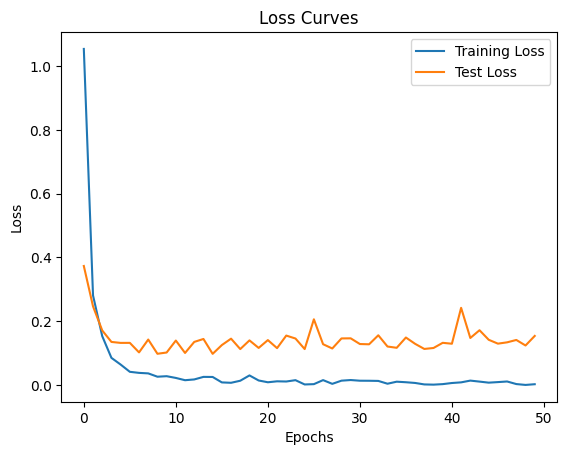

In [19]:
plt.plot(chinese_data.history['loss'])
plt.plot(chinese_data.history['val_loss'])
plt.legend(['Training Loss', 'Test Loss'])
plt.title("Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

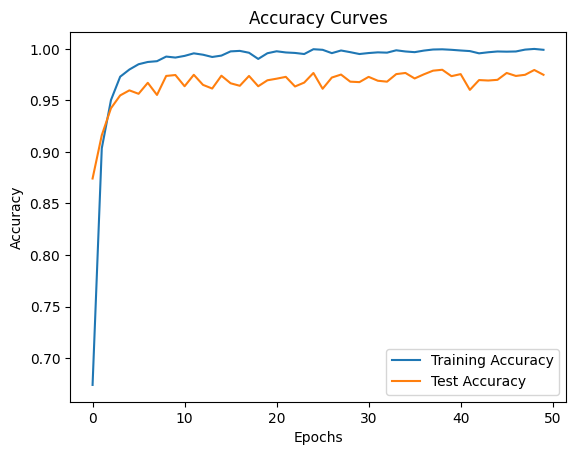

In [20]:
plt.plot(chinese_data.history['accuracy'])
plt.plot(chinese_data.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

11.	Print the confusion matrix. (1)

In [16]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

cm = confusion_matrix(y_pred, y_test)
print(cm)

141/141 [==============================] - 1s 3ms/step
[[300   0   0   0   0   0   0   1   0   0   0   1   0   1   1]
 [  0 300   5   1   0   0   1   0   0   0   1   0   0   0   0]
 [  0   0 289   8   0   0   3   0   0   0   0   0   0   0   0]
 [  0   0   6 290   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 296   0   0   1   0   1   0   0   0   0   1]
 [  0   0   0   1   0 295   0   0   0   0   0   1   0   0   1]
 [  0   0   0   0   0   0 289   2   1   0   0   0   0   2   0]
 [  0   0   0   0   0   0   0 285   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 296   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4   1 286   0   0   1   0   1]
 [  0   0   0   0   0   0   4   3   0   0 291   0   8   2   0]
 [  0   0   0   0   3   4   0   1   0   0   0 296   0   4   0]
 [  0   0   0   0   0   0   0   1   0   0   8   1 290   0   0]
 [  0   0   0   0   0   0   3   0   0   2   0   0   1 288   0]
 [  0   0   0   0   1   1   0   2   2   9   0   1   0   3 296]]

12.	Visualize the predicted and actual image labels for the first 16 images in the test dataset. (4)

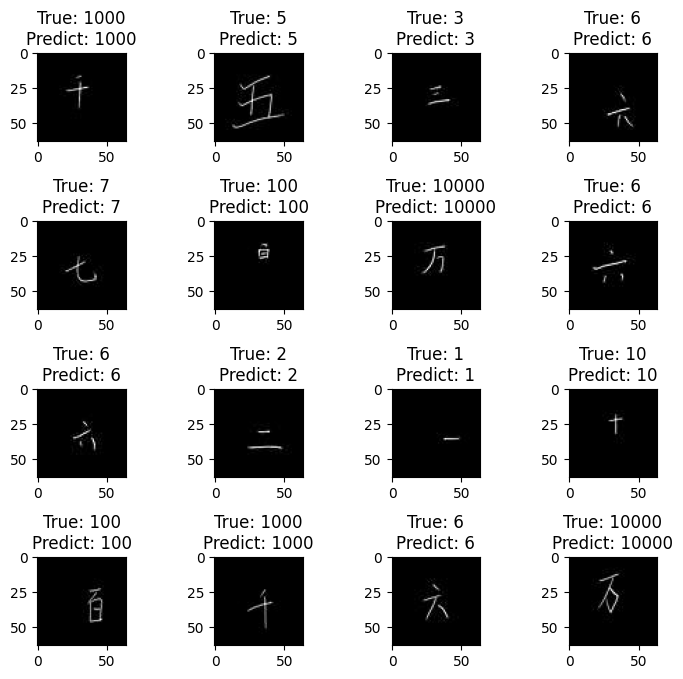

In [17]:
plt.figure(figsize = (8,8))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(X_test[i], cmap = 'gray')
  plt.title("True: " + str(to_orig[y_test.iloc[i]]) + "\nPredict: " + str(to_orig[y_pred[i]]))

plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 1)

13.	Visualize 1 random misclassified image from the test dataset. Display both the predicted and actual image labels. Also display the Chinese character as the X Label. (4)

Text(0.5, 0, '二')

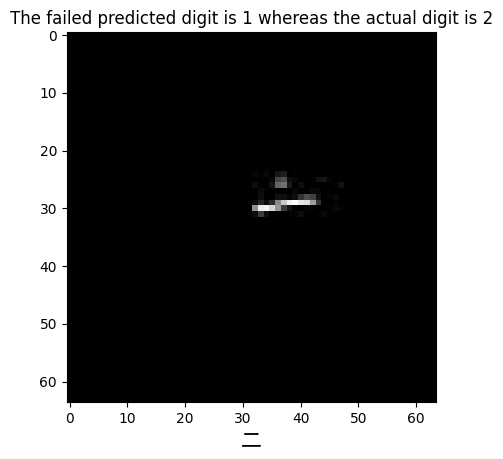

In [18]:
failed_df = X_test[y_pred != y_test]
failed_y_pred = y_pred[y_pred != y_test]
failed_y_test = y_test[y_pred != y_test]

index = np.random.randint(0, len(failed_df))


plt.imshow(failed_df[index], cmap = 'gray')
plt.title("The failed predicted digit is " + str(to_orig[failed_y_pred[index]]) + " whereas the actual digit is " + str(to_orig[failed_y_test.iloc[index]]))

plt.xlabel(chinese_info.iloc[failed_y_test.index[index], 1], fontfamily = 'SimHei', fontsize = 15)